In [2]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Plot data in spherical coordinates

Generate and visualize meshes from data in longitude-latitude coordinates.


In [1]:
import pyvista as pv
import numpy as np


def _cell_bounds(points, bound_position=0.5):
    """
    Calculate coordinate cell boundaries.

    Parameters
    ----------
    points: numpy.array
        One-dimensional array of uniformy spaced values of shape (M,)
    bound_position: bool, optional
        The desired position of the bounds relative to the position
        of the points.

    Returns
    -------
    bounds: numpy.array
        Array of shape (M+1,)

    Examples
    --------
    >>> a = np.arange(-1, 2.5, 0.5)
    >>> a
    array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])
    >>> cell_bounds(a)
    array([-1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25])
    """
    assert points.ndim == 1, "Only 1D points are allowed"
    diffs = np.diff(points)
    delta = diffs[0] * bound_position
    bounds = np.concatenate([[points[0] - delta], points + delta])
    return bounds


# First, create some dummy data

# Approximate radius of the Earth
RADIUS = 6371.0

# Longitudes and latitudes
x = np.arange(0, 360, 5)
y = np.arange(-90, 91, 10)
y_polar = 90.0 - y  # grid_from_sph_coords() expects polar angle

xx, yy = np.meshgrid(x, y)


# x- and y-components of the wind vector
u_vec = np.cos(np.radians(xx))  # zonal
v_vec = np.sin(np.radians(yy))  # meridional

# Scalar data
scalar = u_vec ** 2 + v_vec ** 2

# Create arrays of grid cell boundaries, which have shape of (x.shape[0] + 1)
xx_bounds = _cell_bounds(x)
yy_bounds = _cell_bounds(y_polar)
# Vertical levels
# in this case a single level slightly above the surface of a sphere
levels = [RADIUS * 1.01]

Create a structured grid



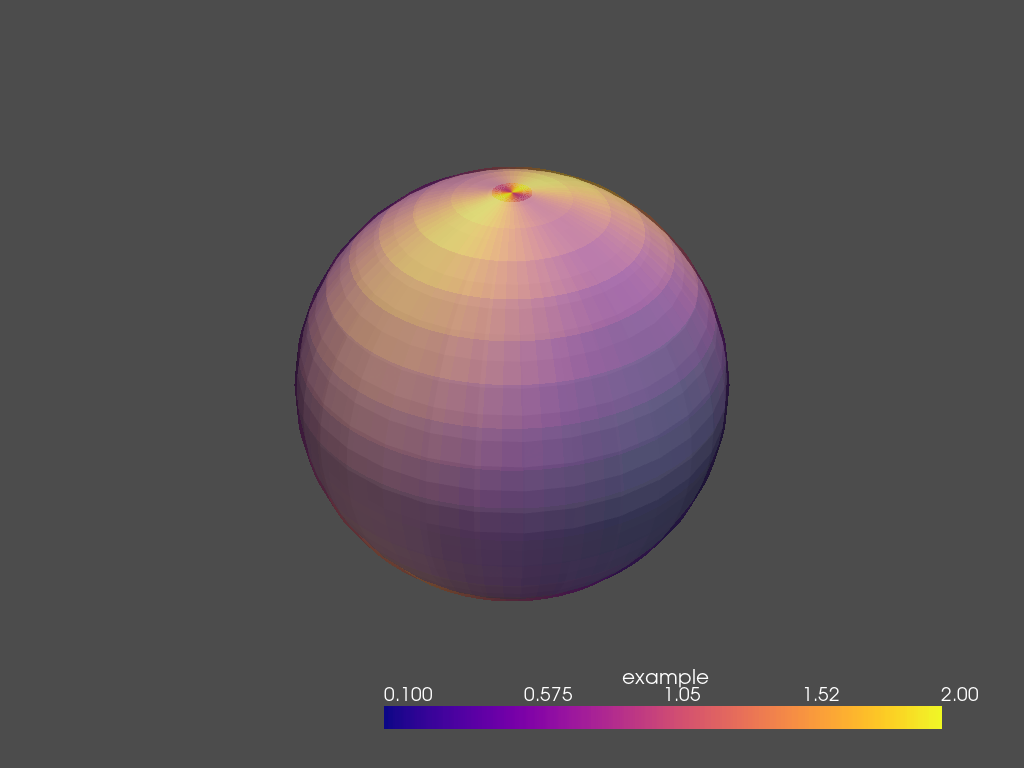

[(24751.49083514534, 24751.49083514534, 24751.49083514534),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [2]:
grid_scalar = pv.grid_from_sph_coords(xx_bounds, yy_bounds, levels)

# And fill its cell arrays with the scalar data
grid_scalar.cell_arrays["example"] = np.array(scalar).swapaxes(-2, -1).ravel("C")

# Make a plot
p = pv.Plotter()
p.add_mesh(pv.Sphere(radius=RADIUS))
p.add_mesh(grid_scalar, clim=[0.1, 2.0], opacity=0.5, cmap="plasma")
p.show()

Visualize vectors in spherical coordinates
Vertical wind



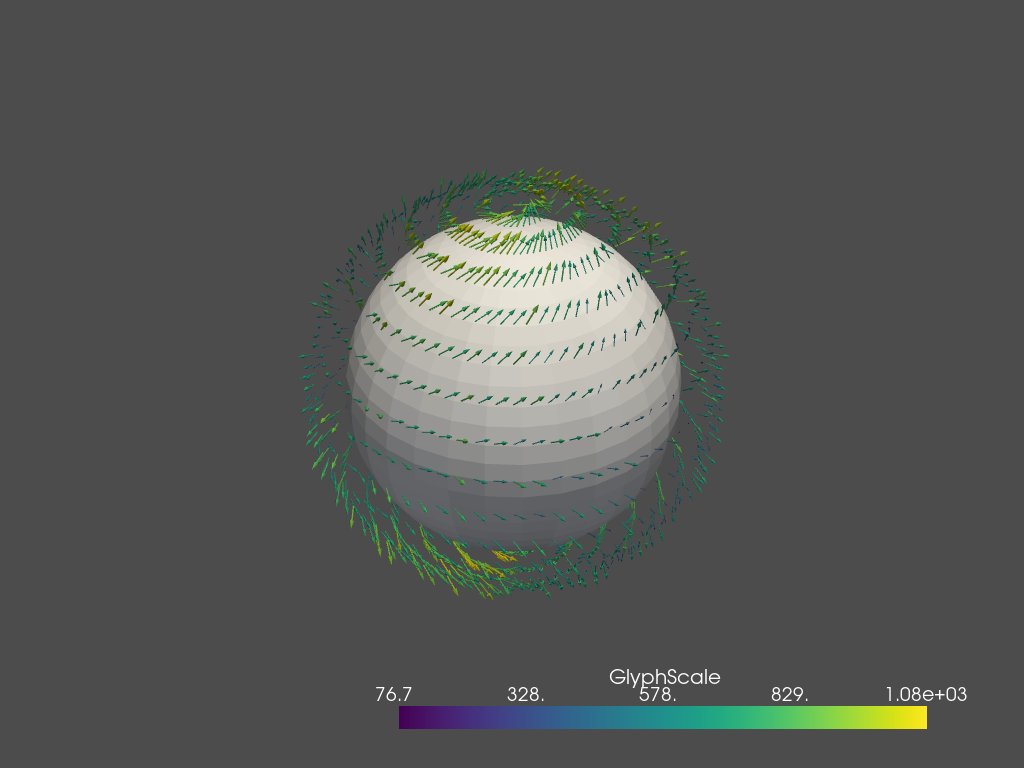

[(31576.929790136153, 31510.853618261153, 31524.35239755803),
 (37.288818359375, -28.787353515625, -15.28857421875),
 (0.0, 0.0, 1.0)]

In [2]:
w_vec = np.random.rand(*u_vec.shape)

wind_level = [RADIUS * 1.2]

# Sequence of axis indices for transpose()
# (1, 0) for 2D arrays
# (2, 1, 0) for 3D arrays
inv_axes = [*range(u_vec.ndim)[::-1]]

# Transform vectors to cartesian coordinates
vectors = np.stack(
    [
        i.transpose(inv_axes).swapaxes(-2, -1).ravel("C")
        for i in pv.transform_vectors_sph_to_cart(
            x,
            y_polar,
            wind_level,
            u_vec.transpose(inv_axes),
            -v_vec.transpose(inv_axes),  # Minus sign because y-vector in polar coords is required
            w_vec.transpose(inv_axes),
        )
    ],
    axis=1,
)

# Scale vectors to make them visible
vectors *= RADIUS * 0.1

# Create a grid for the vectors
grid_winds = pv.grid_from_sph_coords(x, y_polar, wind_level)

# Add vectors to the grid
grid_winds.point_arrays["example"] = vectors

# Show the result
p = pv.Plotter()
p.add_mesh(pv.Sphere(radius=RADIUS))
p.add_mesh(grid_winds.glyph(orient="example", scale="example", tolerance=0.005))
p.show()

Isurfaces of 3D data in spherical coordinates



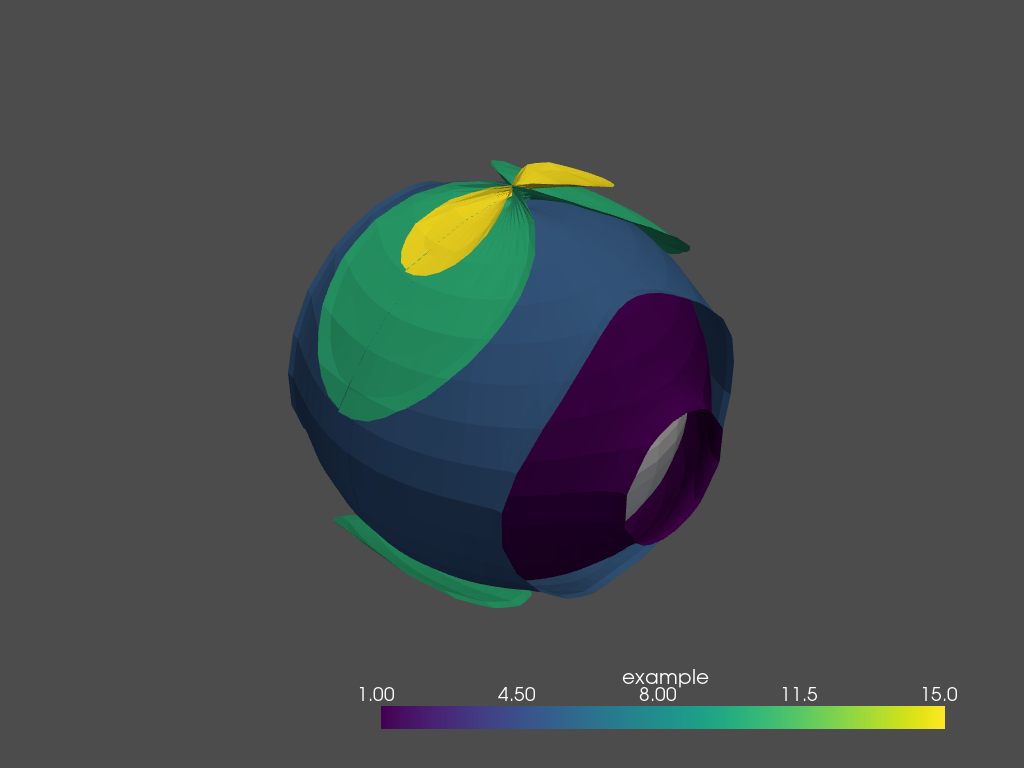

[(29807.472094298726, 29799.23191869352, 29799.23191869352),
 (8.240175605204513, -4.547473508864641e-13, 0.0),
 (0.0, 0.0, 1.0)]

In [3]:
# Number of vertical levels
nlev = 10

# Dummy 3D scalar data
scalar_3d = (
    scalar.repeat(nlev).reshape((*scalar.shape, nlev)) * np.arange(nlev)[np.newaxis, np.newaxis, :]
).transpose(2, 0, 1)


z_scale = 10
z_offset = RADIUS * 1.1

# Now it's not a single level but an array of levels
levels = z_scale * (np.arange(scalar_3d.shape[0] + 1)) ** 2 + z_offset

# Create a structured grid by transforming coordinates
grid_scalar_3d = pv.grid_from_sph_coords(xx_bounds, yy_bounds, levels)

# Add data to the grid
grid_scalar_3d.cell_arrays["example"] = np.array(scalar_3d).swapaxes(-2, -1).ravel("C")

# Create a set of isosurfaces
surfaces = grid_scalar_3d.cell_data_to_point_data().contour(isosurfaces=[1, 5, 10, 15])

# Show the result
p = pv.Plotter()
p.add_mesh(pv.Sphere(radius=RADIUS))
p.add_mesh(surfaces)
p.show()

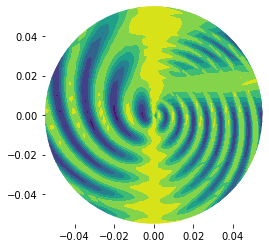

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 8, 50)
y = np.linspace(0, 8, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(subplot_kw = dict(projection = 'polar'))
plt.axis('off')
ax.contourf(X, Y, Z)

new_axis = fig.add_axes(ax.get_position(), frameon = False)
new_axis.plot()
plt.show()

Attempt to Plot MAS Data in 2D Coords:

In [2]:
import pandas as pd
df = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/density.csv',header=None)

In [26]:
df

,0
0,4.000081e+12
1,2.799380e+12
2,1.981510e+12
3,1.410563e+12
4,1.011062e+12
...,...
64436563,4.015703e+02
64436564,3.756932e+02
64436565,3.517481e+02
64436566,3.306184e+02


In [17]:
64436567/3

21478855.666666668

In [27]:
df.reshape(294,314,698)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [3]:
x = df.to_numpy()

In [4]:
density_reshape = x.reshape(294,314,698)

In [6]:
import numpy as np
import pandas as pd
#df = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/density.csv',header=None)
r = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/r.csv',header=None)
t = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/t.csv',header=None)
p = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/p.csv',header=None)

rnew = r.to_numpy()
tnew = t.to_numpy()
pnew = p.to_numpy()

x,y,z = np.meshgrid(rnew,tnew,pnew)

In [32]:
r

,0
0,1.000000
1,1.000530
2,1.001056
3,1.001573
4,1.002081
...,...
289,13.385640
290,13.772467
291,14.172210
292,14.582877


In [36]:
180/15

12.0

ValueError: Argument Z must be 2-dimensional.

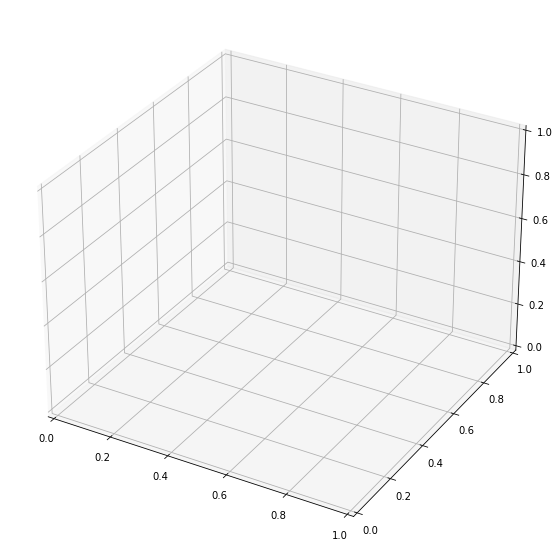

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")
ax.plot_surface(x, y, z)
ax.set(xlabel="x", ylabel="y", zlabel="z", title=title)
plt.close()

<ipython-input-44-0f10d8e2ab10>:26: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) <2
<ipython-input-44-0f10d8e2ab10>:24: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-44-0f10d8e2ab10>:24: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


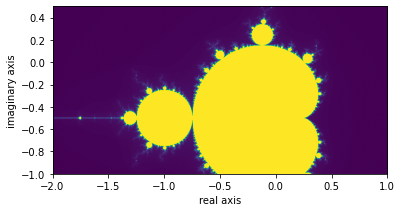

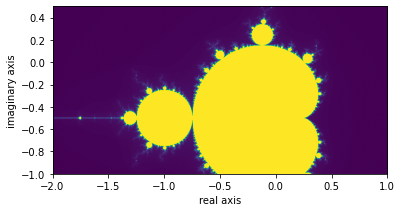

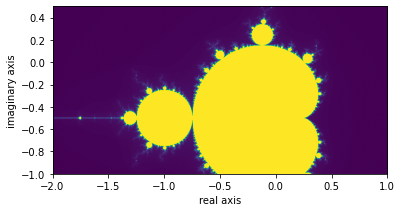

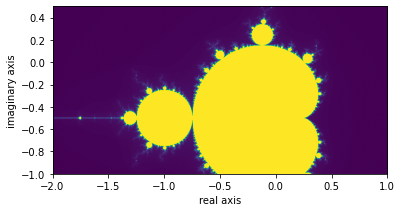

KeyboardInterrupt: 

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time



# Set up series of culaulations to get z
# z = a + bi
for i in range(1,10):
    alin = np.linspace(-2,1,1000)
    blin = np.linspace(-1,0.5,1000)

    a,b = np.meshgrid(alin,blin)

    z = a + b*1j

    c = z.copy()

    steps = np.zeros((len(a), len(b)))
    Z = np.zeros((len(a), len(b)))

    for n in range(256):
        z = z**2 + c
    # Create a mask for every z value that is less than 2 because we do not care about the values that have gone to infinty
        mask = np.abs(z) <2
    # add one to every element that has stayed inside calculation
        steps[mask] += 1
    plt.imshow(steps, extent=[min(alin) ,max(alin), min(blin), max(blin)])
    plt.xlabel("real axis")
    plt.ylabel("imaginary axis")
    plt.show()
    plt.close()


ValueError: x and y can be no greater than 2-D, but have shapes (314, 294, 698) and (314, 294, 698)

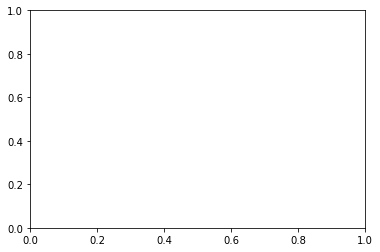

In [46]:
plt.plot(x,y)

In [47]:
x

array([[[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.00053036,  1.00053036,  1.00053036, ...,  1.00053036,
          1.00053036,  1.00053036],
        [ 1.00105584,  1.00105584,  1.00105584, ...,  1.00105584,
          1.00105584,  1.00105584],
        ...,
        [14.17220974, 14.17220974, 14.17220974, ..., 14.17220974,
         14.17220974, 14.17220974],
        [14.58287716, 14.58287716, 14.58287716, ..., 14.58287716,
         14.58287716, 14.58287716],
        [15.        , 15.        , 15.        , ..., 15.        ,
         15.        , 15.        ]],

       [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.00053036,  1.00053036,  1.00053036, ...,  1.00053036,
          1.00053036,  1.00053036],
        [ 1.00105584,  1.00105584,  1.00105584, ...,  1.00105584,
          1.00105584,  1.00105584],
        ...,
        [14.17220974, 14.17220974, 14.17220974, ..., 1

In [48]:
y

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.02147778, 0.02147778, 0.02147778, ..., 0.02147778,
         0.02147778, 0.02147778],
        [0.02147778, 0.02147778, 0.02147778, ..., 0.02147778,
         0.02147778, 0.02147778],
        [0.02147778, 0.02147778, 0.02147778, ..., 0.02147778,
         0.02147778, 0.02147778],
        ...,
        [0.02147778, 0.02147778, 0.02147778, ..., 0.02147778,
         0.02147778, 0.02147778],
        [0.0

In [49]:
z

array([[nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       ...,
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]])

In [7]:
density_reshape.shape

(294, 314, 698)

In [40]:
density_reshape[:,0,:].shape

(294, 698)

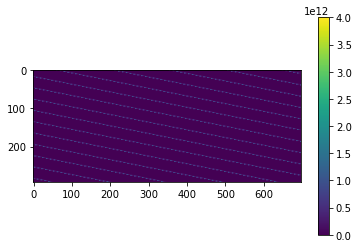

ValueError: x and y must have same first dimension, but have shapes (294, 1) and (314, 1)

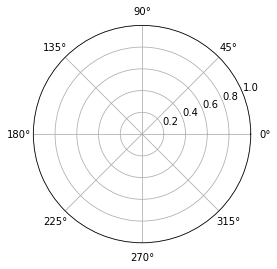

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci   
im = density_reshape[:,200,:]
plt.imshow(im)
plt.colorbar()
plt.show()

plt.polar(rlist,tlist)
plt.show()

In [8]:
import pandas as pd
#df = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/density.csv',header=None)
r = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/r.csv',header=None)
t = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/t.csv',header=None)
p = pd.read_csv('/Volumes/Seagate Backup Plus Drive/Chris/Magnetic_Field/eclipse2017_mhd_final/p.csv',header=None)

rnew = r.to_numpy()
tnew = t.to_numpy()
pnew = p.to_numpy()



In [37]:
pnew*(180/np.pi)

array([[  0.        ],
       [  0.51649928],
       [  1.03299856],
       [  1.54949789],
       [  2.06599711],
       [  2.58249645],
       [  3.09899578],
       [  3.6154949 ],
       [  4.13199423],
       [  4.64849356],
       [  5.16499289],
       [  5.68149222],
       [  6.19799156],
       [  6.71449046],
       [  7.23098979],
       [  7.74748955],
       [  8.26398846],
       [  8.78048822],
       [  9.29698712],
       [  9.81348603],
       [ 10.32998578],
       [ 10.84648469],
       [ 11.36298445],
       [ 11.87948335],
       [ 12.39598311],
       [ 12.91248202],
       [ 13.42898092],
       [ 13.94548068],
       [ 14.46197959],
       [ 14.97847849],
       [ 15.4949791 ],
       [ 16.01147801],
       [ 16.52797691],
       [ 17.04447582],
       [ 17.56097643],
       [ 18.07747534],
       [ 18.59397424],
       [ 19.11047315],
       [ 19.62697205],
       [ 20.14347266],
       [ 20.65997157],
       [ 21.17647047],
       [ 21.69296938],
       [ 22

In [39]:
tnew*(180/np.pi)

array([[  0.        ],
       [  1.23058632],
       [  2.44453111],
       [  3.63026518],
       [  4.78255139],
       [  5.90036179],
       [  6.9843316 ],
       [  8.03544862],
       [  9.05470836],
       [ 10.04307686],
       [ 11.00149071],
       [ 11.93085662],
       [ 12.83205569],
       [ 13.70594082],
       [ 14.5533419 ],
       [ 15.37505806],
       [ 16.17187134],
       [ 16.94453478],
       [ 17.69378092],
       [ 18.42031839],
       [ 19.12483703],
       [ 19.8080028 ],
       [ 20.47046285],
       [ 21.11284555],
       [ 21.73575881],
       [ 22.33979512],
       [ 22.92553678],
       [ 23.49366679],
       [ 24.04527287],
       [ 24.58237504],
       [ 25.10821081],
       [ 25.62674341],
       [ 26.14153477],
       [ 26.6548952 ],
       [ 27.16787656],
       [ 27.68079644],
       [ 28.19371291],
       [ 28.70662597],
       [ 29.21954244],
       [ 29.73245891],
       [ 30.24537197],
       [ 30.75828844],
       [ 31.27120491],
       [ 31

In [11]:
np.array(rnew.tolist(),tnew.tolist())

TypeError: Field elements must be 2- or 3-tuples, got '[0.0]'

In [13]:
rlist = rnew.tolist()
tlist = tnew.tolist()
plist = pnew.tolist()
#A = np.array((rlist,tlist,plist),dtype=float)
rlist

[[1.0],
 [1.000530362129211],
 [1.001055836677551],
 [1.001573204994202],
 [1.00208055973053],
 [1.002577781677246],
 [1.003064870834351],
 [1.003542065620422],
 [1.004009485244751],
 [1.004467368125916],
 [1.004915833473206],
 [1.00535523891449],
 [1.005785703659058],
 [1.006207346916199],
 [1.006620287895203],
 [1.007025003433228],
 [1.007421255111694],
 [1.007809638977051],
 [1.008190631866455],
 [1.008565664291382],
 [1.008937835693359],
 [1.009311676025391],
 [1.009692072868347],
 [1.010082840919495],
 [1.010486245155334],
 [1.010903358459473],
 [1.011334776878357],
 [1.011781096458435],
 [1.012242674827576],
 [1.012720227241516],
 [1.013214230537415],
 [1.013725280761719],
 [1.014253854751587],
 [1.014800667762756],
 [1.015366196632385],
 [1.01595139503479],
 [1.016556620597839],
 [1.017182588577271],
 [1.0178302526474],
 [1.018500208854675],
 [1.019193172454834],
 [1.019909977912903],
 [1.020651578903198],
 [1.021418571472168],
 [1.022212028503418],
 [1.023032784461975],
 [1.023

In [50]:
A.shape

(3,)

In [52]:
density_reshape

array([[[4.00008058e+12, 2.79937958e+12, 1.98151040e+12, ...,
         1.07756961e+07, 1.00940767e+07, 9.44792991e+06],
        [8.83606924e+06, 8.25733104e+06, 7.71058498e+06, ...,
         2.97815380e+04, 2.85679793e+04, 2.74074063e+04],
        [2.62973362e+04, 2.52354115e+04, 2.42193931e+04, ...,
         1.64784326e+09, 1.42306499e+09, 1.22866950e+09],
        ...,
        [2.37405588e+07, 2.18101383e+07, 1.99115036e+07, ...,
         3.44361728e+04, 3.30715032e+04, 3.17649345e+04],
        [3.05138052e+04, 2.93155795e+04, 2.81678443e+04, ...,
         1.12616164e+09, 6.77970577e+08, 4.65239544e+08],
        [4.03343113e+08, 3.69565812e+08, 3.45783572e+08, ...,
         1.44304665e+06, 1.33029170e+06, 1.22915962e+06]],

       [[1.13825185e+06, 1.05633218e+06, 9.82315275e+05, ...,
         7.88165109e+03, 7.49794295e+03, 7.12870107e+03],
        [6.77367982e+03, 6.43261779e+03, 6.10523915e+03, ...,
         9.02725408e+07, 8.72491833e+07, 8.44492885e+07],
        [8.18492494e+07, 

In [67]:
from scipy.interpolate import RegularGridInterpolator
def f(x,y,z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
data = f(*np.meshgrid(x, y, z, indexing='ij', sparse=True))


my_interpolating_function = RegularGridInterpolator((x, y, z), data)

pts = np.array([[2.1, 6.2, 8.3], [3.3, 5.2, 7.1]])

my_interpolating_function(pts)

array([125.80469388, 146.30069388])

In [70]:
data.shape

(11, 22, 33)

In [104]:
def transform(r,t,p):
    x = r*np.sin(t)*np.cos(p)
    y = r*np.sin(t)*np.sin(p)
    return x,y

In [105]:
transform(1,1,1)

(0.4546487134128409, 0.7080734182735712)

In [78]:
datanew = transform(*np.meshgrid(rlist, tlist, plist, indexing='ij', sparse=True))
datanewnew = transform(rlist,tlist,plist)

ValueError: operands could not be broadcast together with shapes (294,1) (314,1) 

In [84]:
pcoord = np.linspace(0,2*np.pi,698)
tcoord = np.linspace(0,np.pi,698)
rcoord = np.linspace(0,15,698)

In [101]:
result = transform(rcoord,tcoord,pcoord)

In [102]:
result[1].shape

(698,)

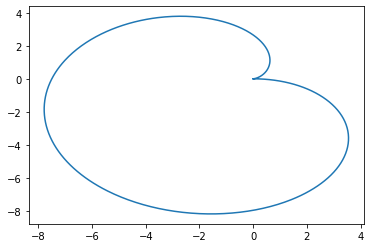

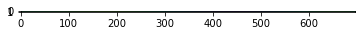

In [106]:
plt.plot(result[0],result[1])
plt.show()

imnew = [result[0],result[1]]
plt.imshow(imnew)
plt.show()

In [55]:
#datanew[0].shape, 
len(rlist),len(tlist),len(plist)

(294, 314, 698)

In [52]:
from tqdm import tqdm_notebook
xlist = []
ylist = []
zlist = []

reshape_new = np.zeros(density_reshape.shape)
for i in tqdm_notebook(range(0,294)):
#     x = rlist[i]*np.sin(tlist[j])*np.cos(plist[k])
#     reshape_new[i] = x
    for j in range(0,10):
#         y = rlist[i]*np.sin(tlist[j])*np.sin(plist[k])
#         reshape_new[i][j] = y
        for k in range(0,698):
            
            x = rlist[i]*np.sin(tlist[j])*np.cos(plist[k])
            y = rlist[i]*np.sin(tlist[j])*np.sin(plist[k])
            z = density_reshape[i][j][k]
            
            
#             reshape_new[i][][] = x
#             reshape_new[][j][] = y
#             reshape_new[][][k] = z
            
            xlist.append(x)
            ylist.append(y)
            zlist.append(z)

<ipython-input-52-00be765c5783>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,294)):


  0%|          | 0/294 [00:00<?, ?it/s]

In [18]:
reshape_new

array([[[4.00008058e+12, 2.79937958e+12, 1.98151040e+12, ...,
         1.07756961e+07, 1.00940767e+07, 9.44792991e+06],
        [8.83606924e+06, 8.25733104e+06, 7.71058498e+06, ...,
         2.97815380e+04, 2.85679793e+04, 2.74074063e+04],
        [2.62973362e+04, 2.52354115e+04, 2.42193931e+04, ...,
         1.64784326e+09, 1.42306499e+09, 1.22866950e+09],
        ...,
        [7.88077456e-01, 7.88077456e-01, 7.88077456e-01, ...,
         7.88077456e-01, 7.88077456e-01, 7.88077456e-01],
        [7.88077456e-01, 7.88077456e-01, 7.88077456e-01, ...,
         7.88077456e-01, 7.88077456e-01, 7.88077456e-01],
        [7.88077456e-01, 7.88077456e-01, 7.88077456e-01, ...,
         7.88077456e-01, 7.88077456e-01, 7.88077456e-01]],

       [[1.13825185e+06, 1.05633218e+06, 9.82315275e+05, ...,
         7.88165109e+03, 7.49794295e+03, 7.12870107e+03],
        [6.77367982e+03, 6.43261779e+03, 6.10523915e+03, ...,
         9.02725408e+07, 8.72491833e+07, 8.44492885e+07],
        [8.18492494e+07, 

In [116]:
comb = np.array([xlist,ylist,zlist])

<ipython-input-116-e32eba5e82f5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  comb = np.array([xlist,ylist,zlist])


In [117]:
comb.shape

(3, 64436568)

TypeError: Invalid shape (64436568,) for image data

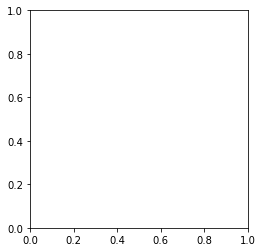

In [120]:
plt.imshow(zlist, extent=(
    np.min(xlist), np.max(xlist), np.min(ylist), np.max(ylist)), interpolation='none')
plt.colorbar()
plt.show()

In [121]:
xlist.reshape(294,314,698)

AttributeError: 'list' object has no attribute 'reshape'

In [122]:
np.array(xlist)

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       ...,
       [-1.31112858e-06],
       [-1.31128841e-06],
       [-1.31134169e-06]])

In [123]:
np.array(ylist)

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       ...,
       [ 2.36409486e-08],
       [ 1.18208399e-08],
       [-2.29282272e-13]])

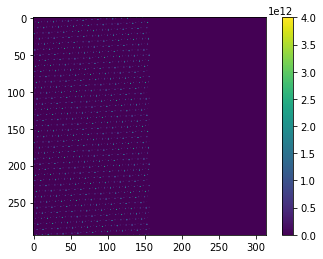

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci   
im = reshape_new[:,:,0]
plt.imshow(im)
plt.colorbar()
plt.show()



In [43]:
test_arr = np.zeros((5,5,5))
test_arr

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [44]:
for i in range(0,5):
    test_arr[i][0][0] = 1
    for j in range(0,5):
        test_arr[0][j][0] = 2
        for k in range(0,5):
            test_arr[0][0][k] = 3
test_arr

array([[[3., 3., 3., 3., 3.],
        [2., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

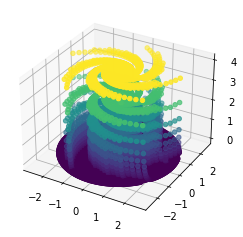

In [53]:
ax = plt.axes(projection='3d')
ax.scatter3D(xlist, ylist, zlist, c=zlist)
plt.colorbar()
plt.show()

In [65]:
imnews = np.array([xlist, ylist, zlist])

<ipython-input-65-ae6768d24f35>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  imnews = np.array([xlist, ylist, zlist])


TypeError: Image data of dtype object cannot be converted to float

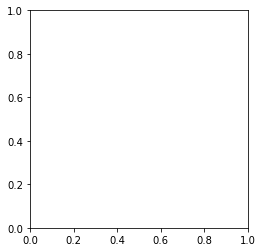

In [63]:
plt.imshow(imnews)
plt.show

In [71]:
imnewsnew = np.ravel(imnews).reshape(3,2052120)

In [68]:
len(xlist)

2052120

TypeError: Image data of dtype object cannot be converted to float

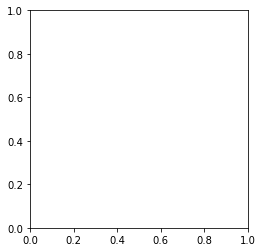

In [73]:
plt.imshow(imnewsnew)
plt.colorbar()
plt.show()

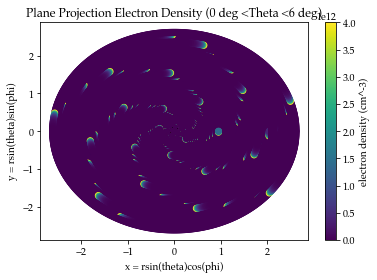

In [87]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)
plt.scatter(xlist,ylist,c=zlist)
plt.colorbar(label='electron density (cm^-3)')
plt.xlabel('x = rsin(theta)cos(phi)')
plt.ylabel('y = rsin(theta)sin(phi)')
plt.title('Plane Projection Electron Density (0 deg <Theta <6 deg)')
plt.show()

In [79]:
10* (180/np.pi)

572.9577951308232

In [81]:
(np.pi / 314) * 10 * (180/np.pi)

5.7324840764331215

In [ ]:
B_0 = 6.92535
L_0 = 290.702

